In [1]:
!pip install qiskit
!pip install pylatexenc
!pip install qiskit-aer

In [ ]:
#On installe qiskit, pylatexenc et qiskit-aer

In [2]:
import numpy as np
import qiskit
import matplotlib
from qiskit import *
from qiskit import *
from qiskit.visualization import circuit_drawer
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer, execute

In [ ]:
#On importe toute les bibliothèque nécessaire (numpy, transpile, circuit_drawer, matplotlib, ...)

In [3]:
q = QuantumRegister(8)
c = ClassicalRegister(8)
circ = QuantumCircuit(q, c)

In [ ]:
##Alice,Dalia,  Bob, et Charlie sont représentés par un registre quantique (q) de 8 qubits, chacun ayant la possibilité d'être dans un état superposé (Hadamard est appliqué à tous les qubits).

In [4]:
circ.h(q[0:8])

In [ ]:
##Chaque personne (représentée par un qubit) applique la porte Hadamard, plaçant son qubit dans une superposition d'états.

In [5]:
circ.barrier()

In [6]:
circ.cx(1,4)
circ.cx(2,4)
circ.cx(3,4)
circ.barrier()

In [ ]:
##Alice dit au autre tout ce qu'elle vois devant elle

In [7]:
circ.draw()

┌───┐ ░                
q0_0: ┤ H ├─░────────────────
      ├───┤ ░                
q0_1: ┤ H ├─░───■────────────
      ├───┤ ░   │            
q0_2: ┤ H ├─░───┼────■───────
      ├───┤ ░   │    │       
q0_3: ┤ H ├─░───┼────┼────■──
      ├───┤ ░ ┌─┴─┐┌─┴─┐┌─┴─┐
q0_4: ┤ H ├─░─┤ X ├┤ X ├┤ X ├
      ├───┤ ░ └───┘└───┘└───┘
q0_5: ┤ H ├─░────────────────
      ├───┤ ░                
q0_6: ┤ H ├─░────────────────
      ├───┤ ░                
q0_7: ┤ H ├─░────────────────
      └───┘ ░                
c0: 8/═══════════════════════

In [8]:
circ.cx(4,5)
circ.cx(4,6)
circ.cx(4,7)
circ.barrier()

In [ ]:
##Dalia, Bob et Charlie appliquent une porte CNOT à leur qubit respectif qui représente le réultat qu'annonce Alice

In [10]:
circ.cx(2,5)
circ.cx(3,5)
circ.barrier()

In [ ]:
##Dalia annonce ce qu'elle vois devant elle 

In [12]:
circ.cx(5,6)
circ.cx(5,7)
circ.barrier()

In [ ]:
##Bot et Charlie appliquent une porte CNOT à leur qubit respectif qui représente le réultat qu'annonce Dalia

In [13]:
circ.draw()

In [14]:
circ.cx(3,6)
circ.barrier()

In [ ]:
##Bob annonce ce qu'il vois devant lui 

In [ ]:
##Charlie appliquent une porte CNOT à leur qubit respectif qui représente le réultat qu'annonce Bob

In [15]:
circ.barrier()

In [16]:
circ.cx(6,7)

In [ ]:
##Charlie annonce donc se qu'il a en fonction des reponces des autres

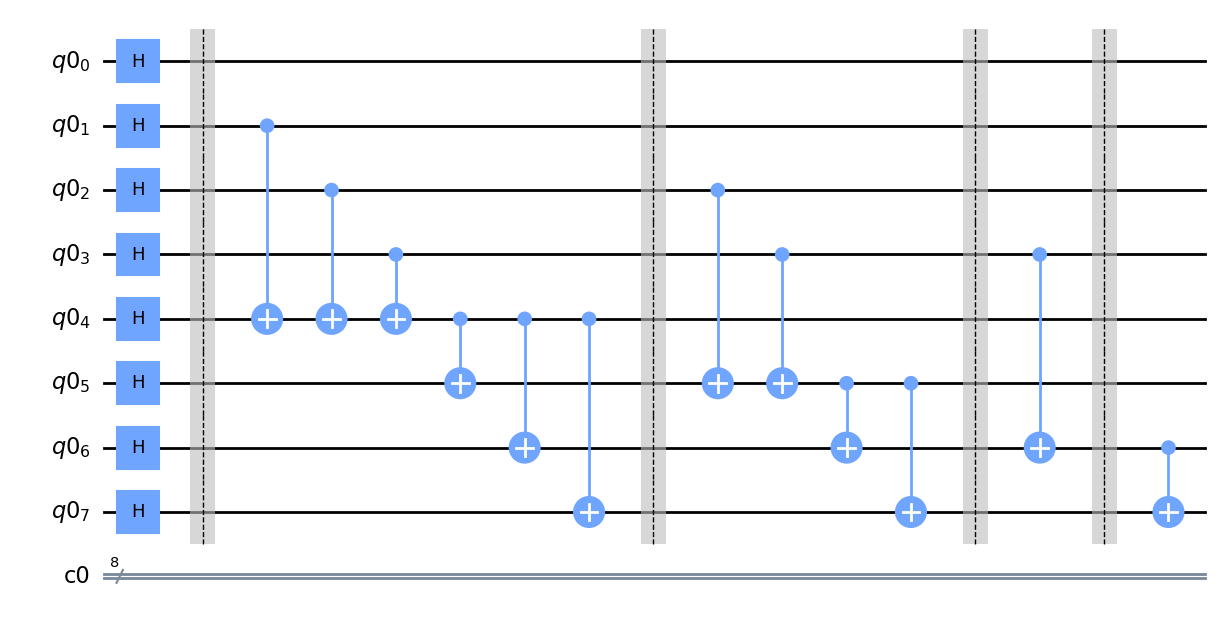

In [18]:
circuit_drawer(circ, output='mpl', style="clifford")

In [19]:
circ.measure(q, c)
##Les participants mesurent finalement la couleur de leurs propres cheveux, représentée par les qubits, et stockent les résultats dans le registre classique.
## Visualisation du circuit
circ.draw()

┌───┐ ░                                ░                      ░       ░ »
q0_0: ┤ H ├─░────────────────────────────────░──────────────────────░───────░─»
      ├───┤ ░                                ░                      ░       ░ »
q0_1: ┤ H ├─░───■────────────────────────────░──────────────────────░───────░─»
      ├───┤ ░   │                            ░                      ░       ░ »
q0_2: ┤ H ├─░───┼────■───────────────────────░───■──────────────────░───────░─»
      ├───┤ ░   │    │                       ░   │                  ░       ░ »
q0_3: ┤ H ├─░───┼────┼────■──────────────────░───┼────■─────────────░───■───░─»
      ├───┤ ░ ┌─┴─┐┌─┴─┐┌─┴─┐                ░   │    │             ░   │   ░ »
q0_4: ┤ H ├─░─┤ X ├┤ X ├┤ X ├──■────■────■───░───┼────┼─────────────░───┼───░─»
      ├───┤ ░ └───┘└───┘└───┘┌─┴─┐  │    │   ░ ┌─┴─┐┌─┴─┐           ░   │   ░ »
q0_5: ┤ H ├─░────────────────┤ X ├──┼────┼───░─┤ X ├┤ X ├──■────■───░───┼───░─»
      ├───┤ ░                └───┘┌─┴─┐  │   ░ └───┘└───┘┌─┴─┐  │   ░ ┌─┴─┐ ░ »
q0_6: ┤ H ├─░─────────────────────┤ X ├──┼───░───────────┤ X ├──┼───░─┤ X ├─░─»
      ├───┤ ░                     └───┘┌─┴─┐ ░           └───┘┌─┴─┐ ░ └───┘ ░ »
q0_7: ┤ H ├─░──────────────────────────┤ X ├─░────────────────┤ X ├─░───────░─»
      └───┘ ░                          └───┘ ░                └───┘ ░       ░ »
c0: 8/════════════════════════════════════════════════════════════════════════»
                                                                              »
«           ┌─┐                     
«q0_0: ─────┤M├─────────────────────
«           └╥┘┌─┐                  
«q0_1: ──────╫─┤M├──────────────────
«            ║ └╥┘┌─┐               
«q0_2: ──────╫──╫─┤M├───────────────
«            ║  ║ └╥┘┌─┐            
«q0_3: ──────╫──╫──╫─┤M├────────────
«            ║  ║  ║ └╥┘┌─┐         
«q0_4: ──────╫──╫──╫──╫─┤M├─────────
«            ║  ║  ║  ║ └╥┘┌─┐      
«q0_5: ──────╫──╫──╫──╫──╫─┤M├──────
«            ║  ║  ║  ║  ║ └╥┘┌─┐   
«q0_6: ──■───╫──╫──╫──╫──╫──╫─┤M├───
«      ┌─┴─┐ ║  ║  ║  ║  ║  ║ └╥┘┌─┐
«q0_7: ┤ X ├─╫──╫──╫──╫──╫──╫──╫─┤M├
«      └───┘ ║  ║  ║  ║  ║  ║  ║ └╥┘
«c0: 8/══════╩══╩══╩══╩══╩══╩══╩══╩═
«            0  1  2  3  4  5  6  7